In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging 
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(assctime)s - %(levelname)s -%(message)s',force = True)


In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
# Checking Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

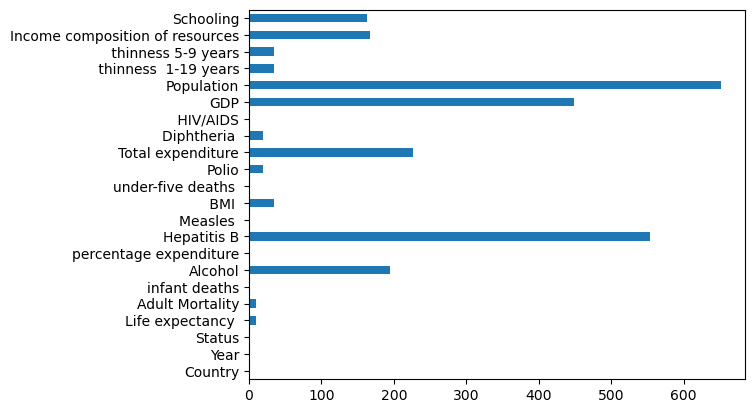

In [4]:
# Checking null values information stats
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [5]:
# Checking Columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# Segregate Categorical and Numerical Columns

numerical_col = df.select_dtypes(include = ['int64','float64'])
categorical_col = df.select_dtypes(include = 'object')

In [7]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [8]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

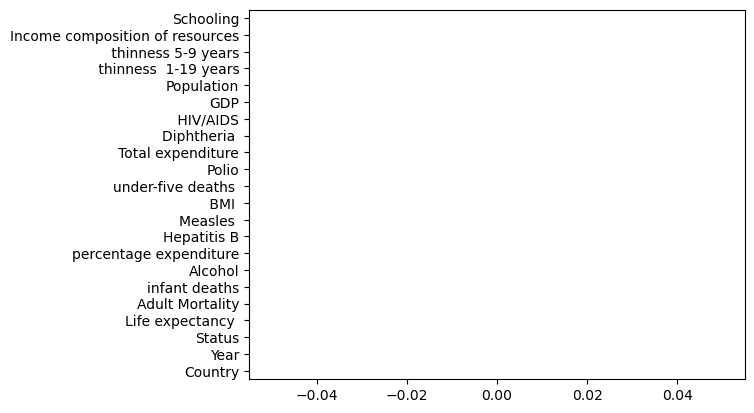

In [9]:
df.isnull().sum().plot(kind= 'barh')
plt.show()

In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [12]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003.0,1,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002.0,1,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001.0,1,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
X = df.drop(columns = ['Country','Life expectancy '],axis = 1)
y = df['Life expectancy ']

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 42)


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The model Accuracy of the Random Forest Regressor is: ',r2_score(y_test,y_pred_RF))

The model Accuracy of the Random Forest Regressor is:  0.9621550848604707


In [21]:
# Using XGBoost Algorithm
import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('The model Accuracy of the XGBoost Regressor is: ',r2_score(y_test,y_pred_xgb))

The model Accuracy of the XGBoost Regressor is:  0.9607817728081423


In [22]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 1.9 MB/s eta 0:00:55
    --------------------------------------- 1.3/102.4 MB 2.3 MB/s eta 0:00:44
    --------------------------------------- 1.8/102.4 MB 2.5 MB/s eta 0:00:40
   - -------------------------------------- 2.6/102.4 MB 2.7 MB/s eta 0:00:38
   - -------------------------------------- 3.1/102.4 MB 2.6 MB/s eta 0:00:38
   - -------------------------------------- 3.7/102.4 MB 2.7 MB/s eta 0:00:38
   - -------------------------------------- 4.2/102.4 MB 2.7 MB/s eta 0:00:37
   - -------------------------------------- 5.0/102.4 MB 2.7 MB/s eta 0:00:36
   -- ------------------------------------- 5.5/102.4 MB 2.8 MB/s eta 0:00:35
   -- ------------------------------------- 6.3/102.4 MB 2.8 MB/s eta 0:00:35
   -- ------------------------------------- 6.8/102.4 MB 2.8 MB/s eta 0:00:35


In [23]:
#CatBoost Regression Model
from catboost import CatBoostRegressor
CB = CatBoostRegressor().fit(X_train,y_train)
y_pred_CB = CB.predict(X_test)
print('The model Accuracy of the CatBoost Regressor is: ',r2_score(y_test,y_pred_CB))

Learning rate set to 0.045881
0:	learn: 9.1119510	total: 173ms	remaining: 2m 53s
1:	learn: 8.8204165	total: 185ms	remaining: 1m 32s
2:	learn: 8.5145260	total: 199ms	remaining: 1m 6s
3:	learn: 8.2291931	total: 221ms	remaining: 55s
4:	learn: 7.9513867	total: 236ms	remaining: 47s
5:	learn: 7.7038096	total: 251ms	remaining: 41.6s
6:	learn: 7.4707665	total: 262ms	remaining: 37.1s
7:	learn: 7.2261780	total: 272ms	remaining: 33.7s
8:	learn: 7.0063564	total: 280ms	remaining: 30.9s
9:	learn: 6.7981187	total: 287ms	remaining: 28.4s
10:	learn: 6.5814997	total: 296ms	remaining: 26.6s
11:	learn: 6.3856870	total: 302ms	remaining: 24.9s
12:	learn: 6.1920671	total: 311ms	remaining: 23.6s
13:	learn: 6.0161754	total: 317ms	remaining: 22.3s
14:	learn: 5.8463690	total: 328ms	remaining: 21.5s
15:	learn: 5.6954421	total: 334ms	remaining: 20.5s
16:	learn: 5.5407511	total: 343ms	remaining: 19.9s
17:	learn: 5.3868577	total: 350ms	remaining: 19.1s
18:	learn: 5.2430422	total: 359ms	remaining: 18.5s
19:	learn: 5.

In [24]:
#ADABoost Regression Model
from sklearn.ensemble import AdaBoostRegressor
AB = AdaBoostRegressor().fit(X_train,y_train)
y_pred_AB = AB.predict(X_test)
print('The model Accuracy of the AdaBoost Regressor is: ',r2_score(y_test,y_pred_AB))

The model Accuracy of the AdaBoost Regressor is:  0.9024123455374436


In [25]:
#KNeighbors Regression Model
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KNR = KNR.predict(X_test)
print('The model Accuracy of the KNeighbors Regressor is: ',r2_score(y_test,y_pred_KNR))

The model Accuracy of the KNeighbors Regressor is:  0.896243785550191


In [31]:
from sklearn.model_selection import RandomizedSearchCV

#Initializing the model
rf = RandomForestRegressor()

#Defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None]
}   

#RandomizedSearchCV setup

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    cv=10,  # Number of cross-validation folds
    scoring='r2',  # Scoring metric
    random_state=42,
    n_jobs=-1,  # Use all available cores
    error_score='raise'  # Raise an error if a fit fails
)

#Fit to the training data
random_search.fit(X_train, y_train)

#best model
best_rf_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Score: 0.9536501970916668


In [44]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor().fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
print('The model Accuracy of the RANSAC Regressor is: ', r2_score(y_test, y_pred_ransac))

The model Accuracy of the RANSAC Regressor is:  0.38308569208924725


In [ ]:
'''
linear regression model kaun kauns se hote hai :

1. Linear Regression
2. Ridge Regression(L1 Regularization)
3. Lasso Regression(L2 Regularization)
4. ElasticNet Regression(L1 and L2 Regularization)
5. Huber Regression
6. Ransac Regression

*** When model is overfit in that case only use ridge and lasso regression ***

'''